In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import pandas as pd

df = pd.read_csv("Expanded_data_with_more_features.csv")
print(df.head())   # lowercase 'head'


   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [6]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [8]:
df.info()
# for data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [9]:
df.isnull().sum()
#for find null value

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [11]:
#drop unname colume
df = df.drop("Unnamed: 0", axis = 1)
print(df.head())#head is for fisrt 5 value seen

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


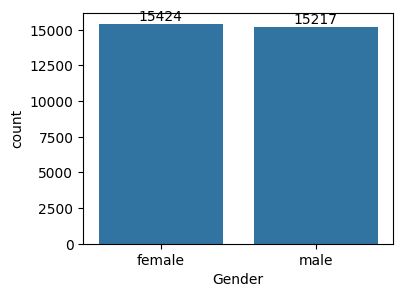

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender distribution chart
plt.figure(figsize=(4,3))
ax = sns.countplot(data=df, x="Gender")  # assign the axis to 'ax'

# Add labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()


In [20]:
# Adjust column names based on your DataFrame
gb = df.groupby("ParentEduc").agg({
    "MathScore": "mean",
    "ReadingScore": "mean",
    "WritingScore": "mean"
})

print(gb)


                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


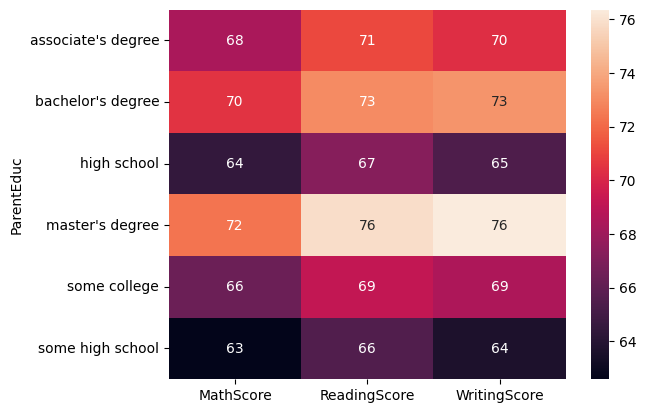

<Figure size 100x100 with 0 Axes>

In [25]:
sns.heatmap(gb,annot = True)
plt.figure(figsize=(1,1))
# impact on education by parent education
plt.show()

In [27]:
# education impact on marital status 
# Adjust column names based on your DataFrame
gb1 = df.groupby("ParentMaritalStatus").agg({
    "MathScore": "mean",
    "ReadingScore": "mean",
    "WritingScore": "mean"
})

print(gb1)


                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


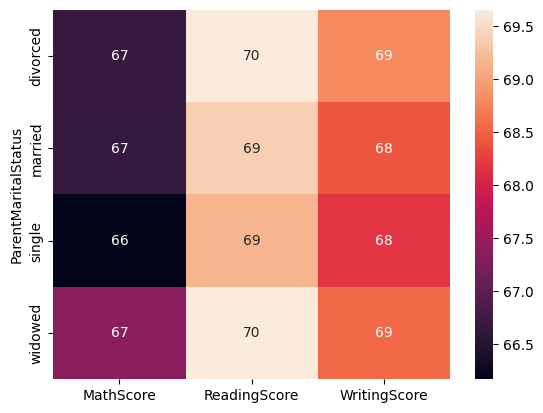

<Figure size 100x100 with 0 Axes>

In [28]:
sns.heatmap(gb,annot = True)
plt.figure(figsize=(1,1))
# impact on education by parent marital satust
plt.show()

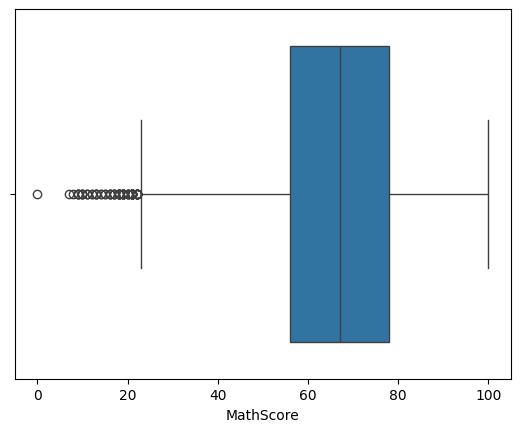

In [30]:
sns.boxplot(data = df, x = "MathScore")
plt.show()

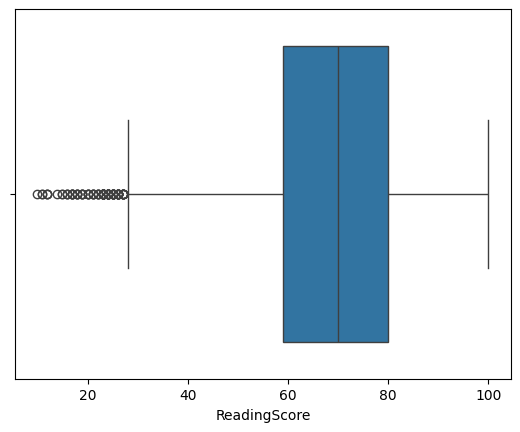

In [31]:
sns.boxplot(data = df, x = "ReadingScore")
plt.show()

In [32]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


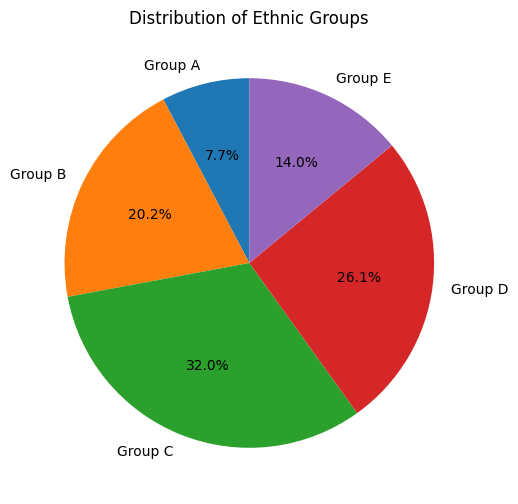

In [42]:
import matplotlib.pyplot as plt

# Count of each ethnic group
groupA = df.loc[df['EthnicGroup'] == "group A"].count()
groupB = df.loc[df['EthnicGroup'] == "group B"].count()
groupC = df.loc[df['EthnicGroup'] == "group C"].count()
groupD = df.loc[df['EthnicGroup'] == "group D"].count()
groupE = df.loc[df['EthnicGroup'] == "group E"].count()

# List of counts
mlist = [
    groupA["EthnicGroup"],
    groupB["EthnicGroup"],
    groupC["EthnicGroup"],
    groupD["EthnicGroup"],
    groupE["EthnicGroup"]
]

# Labels for pie chart
labels = ["Group A", "Group B", "Group C", "Group D", "Group E"]

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(mlist, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Ethnic Groups")
plt.show()


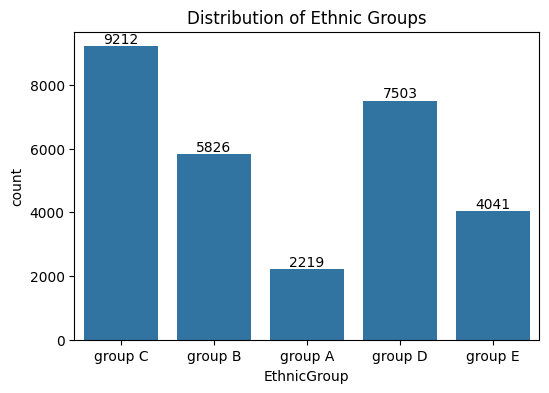

In [46]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x="EthnicGroup")  # assign the axis

# Add labels on top of bars
for container in ax.containers:
    ax.bar_label(container)

plt.title("Distribution of Ethnic Groups")
plt.show()


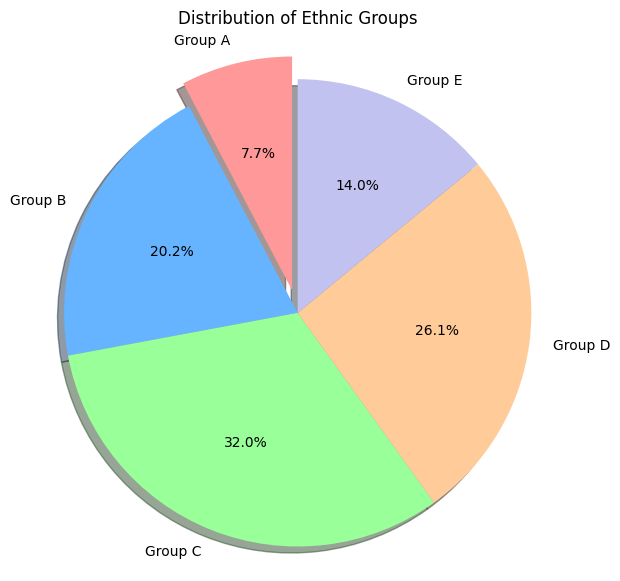

In [48]:
import matplotlib.pyplot as plt

# Count of each ethnic group individually
# Using boolean indexing to filter rows for each group and counting non-NA values
groupA = df.loc[df['EthnicGroup'] == "group A"].count()
groupB = df.loc[df['EthnicGroup'] == "group B"].count()
groupC = df.loc[df['EthnicGroup'] == "group C"].count()
groupD = df.loc[df['EthnicGroup'] == "group D"].count()
groupE = df.loc[df['EthnicGroup'] == "group E"].count()

# Create a list of counts for the pie chart
mlist = [
    groupA["EthnicGroup"],  
    groupB["EthnicGroup"],  
    groupC["EthnicGroup"],  
    groupD["EthnicGroup"],  
    groupE["EthnicGroup"]   ]

# Labels for each slice of the pie chart
labels = ["Group A", "Group B", "Group C", "Group D", "Group E"]

# Colors for each slice (can be customized)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

# Explode the first slice (Group A) to emphasize it
explode = (0.1, 0, 0, 0, 0)  # Only Group A is "exploded"

# Create the pie chart
plt.figure(figsize=(7,7))  # Set figure size
plt.pie(
    mlist,                 # The counts for each group
    labels=labels,         # Labels for slices
    autopct="%1.1f%%",     # Display percentage on slices
    startangle=90,         # Start the first slice at 90 degrees
    colors=colors,         # Custom colors
    explode=explode,       # Explode one slice for emphasis
    shadow=True            # Add shadow for 3D effect
)

plt.title("Distribution of Ethnic Groups")  # Add a title
plt.axis("equal")  # Equal aspect ratio ensures pie is a circle
plt.show()         # Display the pie chart
